In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [2]:
import image_processing
import data_handler
import models

c:\Personal_Files\Projects\Github\offline_HWR\Offline_HWR\currentenv\lib\site-packages\numpy\core\numeric.py:2463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


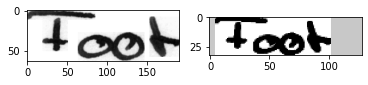

In [3]:

img = cv.imread(
    r'C:\Personal_Files\Projects\Github\offline_HWR\Offline_HWR\src\training\a01-000u-03-05.png',
    cv.IMREAD_GRAYSCALE)

# img = cv.imread(
#     r'C:\Personal_Files\Projects\Github\offline_HWR\Offline_HWR\src\training\a04-010-00-01.png',
#     cv.IMREAD_GRAYSCALE)

# img = cv.imread(
#     r'C:\Personal_Files\Projects\Github\offline_HWR\Offline_HWR\src\training\a01-000x-00-06.png',
#     cv.IMREAD_GRAYSCALE)

img = image_processing.process_image_prediction(img, verbose=True)

In [37]:
data_raw = data_handler.import_dataset(r'C:\Personal_Files\Projects\Github\offline_HWR\Offline_HWR\src\words.txt')

LOG:  Loading datafrom database ... 


In [38]:
data, labels = data_handler.extract_data_labels(data_raw, r'C:\Personal_Files\Projects\Github\offline_HWR\Offline_HWR\src\words', num_data=5000)

LOG:  Processing data ... 
LOG:  Data was processed


In [39]:
labels_encoded = data_handler.encode_labels(labels)

In [40]:
print("shape of data: ", data.shape)
print("shape of labels: ", labels_encoded.shape)


shape of data:  (5000, 128, 32)
shape of labels:  (5000, 16)


In [41]:
model = models.Conventional_CNN()

In [42]:
model = models.build_and_compile_model(model)

In [43]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                   patience=2,
                                                   restore_best_weights=True)


history = model.fit(x=data,
                    y=labels_encoded,
                    batch_size=16,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stopping],
                    shuffle=True)


Epoch 1/5
282/282 [==============================] - 52s 163ms/step - loss: 18.9971 - val_loss: 15.7737
Epoch 2/5
282/282 [==============================] - 48s 172ms/step - loss: 15.1597 - val_loss: 15.0445
Epoch 3/5
282/282 [==============================] - 44s 157ms/step - loss: 14.7042 - val_loss: 14.6794
Epoch 4/5
282/282 [==============================] - 44s 154ms/step - loss: 14.3029 - val_loss: 14.4303
Epoch 5/5
282/282 [==============================] - 46s 163ms/step - loss: 13.9553 - val_loss: 14.1533


In [44]:
prediction = model.predict(img)

1/1 [==============================] - 2s 2s/step


In [45]:
data_handler.decode_batch_predictions(prediction)

's9d'

In [ ]:
model.save('out.h5')